Import libraries

In [1]:
import os
import glob
#import sys
#sys.path.insert(0, '/Users/eeko/openms-develop/openms_build/pyOpenMS')
from pyopenms import *
import pandas as pd

Determination of memory status is not supported on this 
 platform, measuring for memoryleaks will never fail


# `GNPSExport Workflow`

This workflow consists of 7 steps that generate a directory with all the files necessary to create a FBMN job at GNPS. (see https://ccms-ucsd.github.io/GNPSDocumentation/featurebasedmolecularnetworking-with-openms/) 

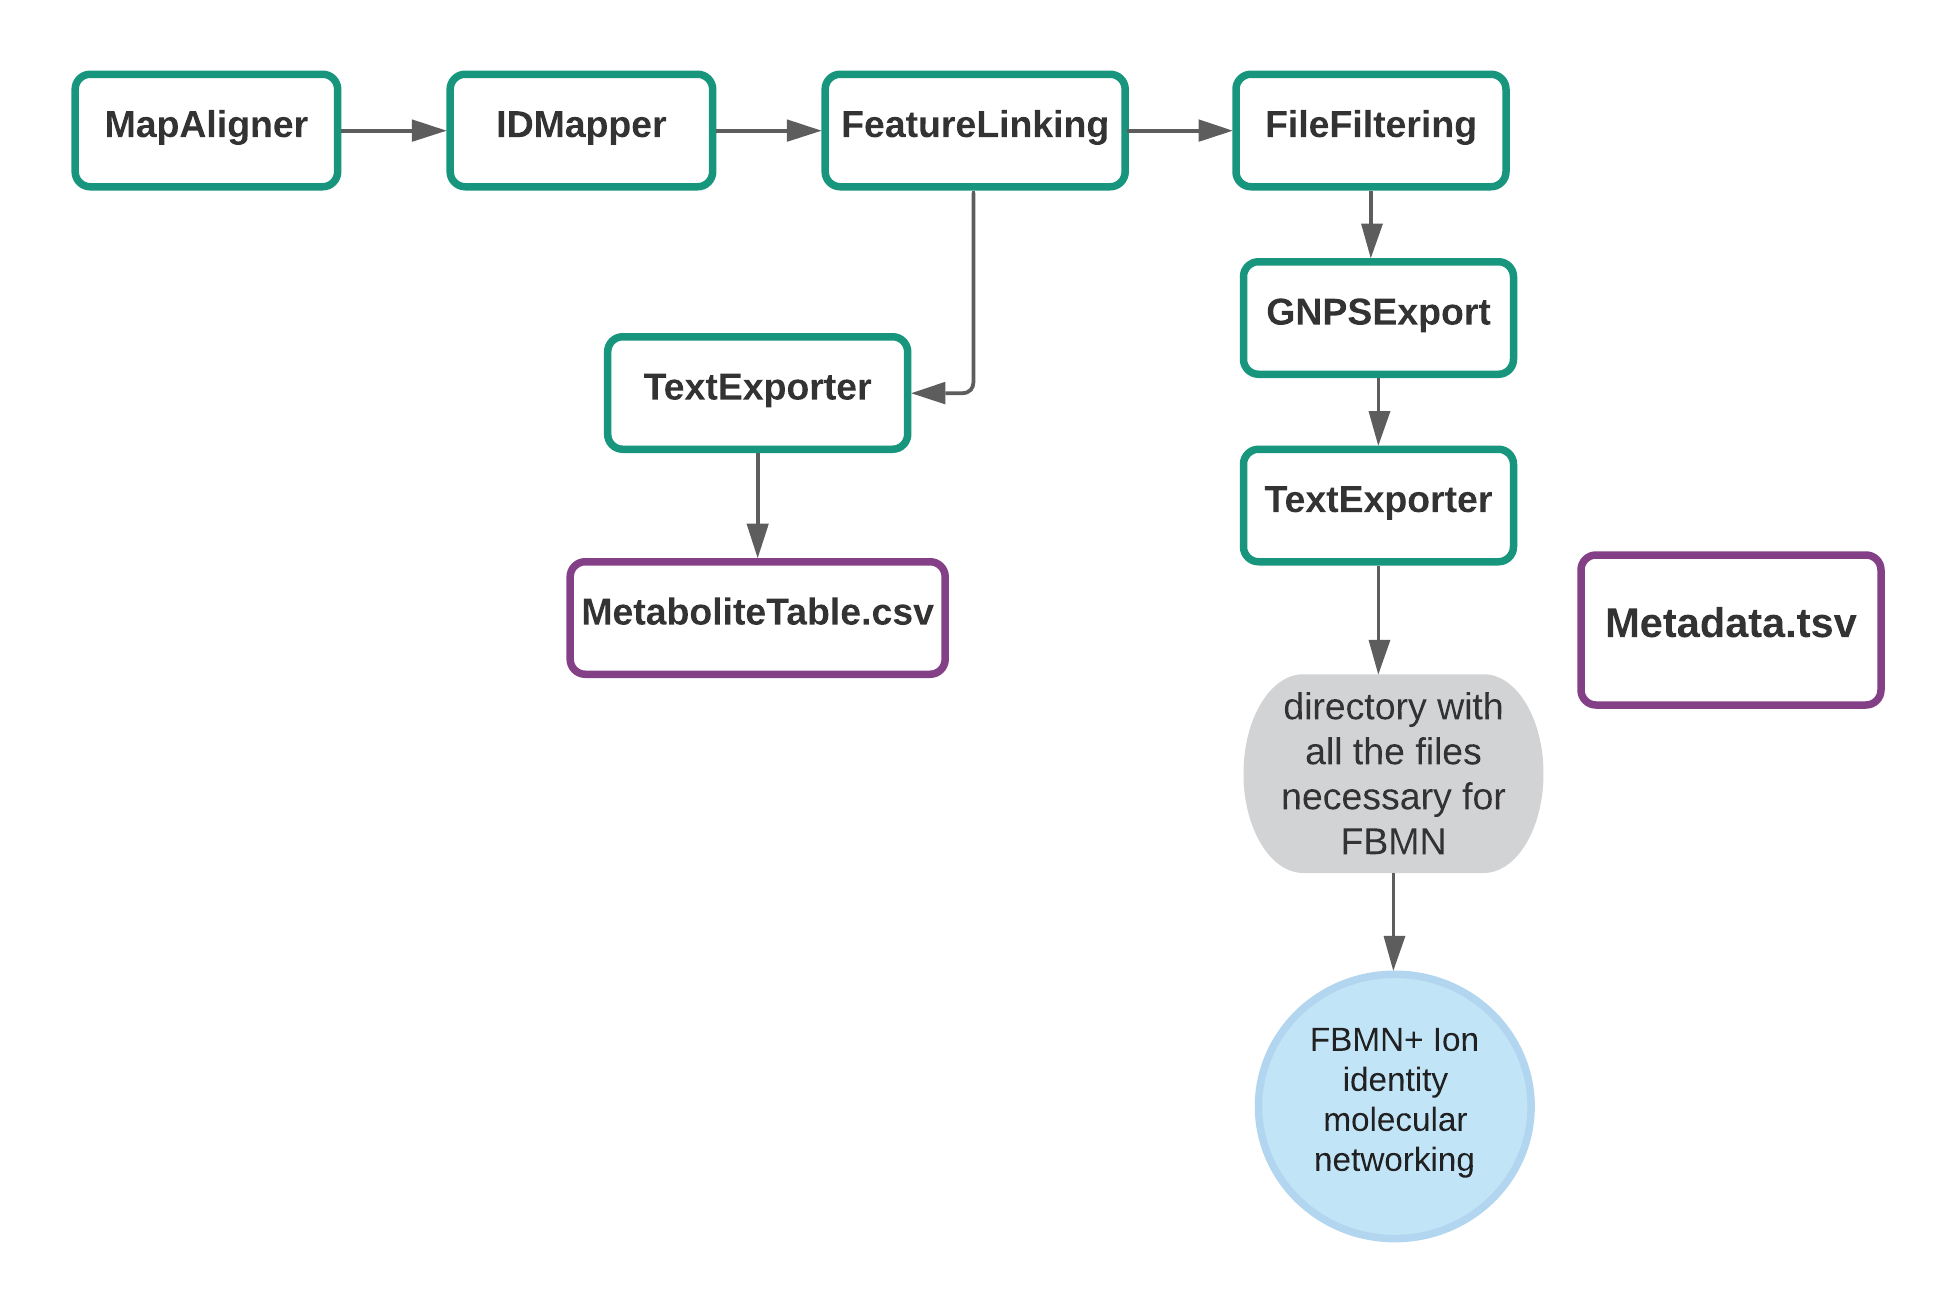

#### `1) Create a metadata tsv file for GNPS`

In [14]:
!(cd data/raw && ls *.raw > filelist.txt)

In [15]:
path= "results/GNPSexport/interim"
isExist= os.path.exists(path)
if not isExist:
    os.mkdir(path)
    
header_list = ["filename"]
metadata=pd.read_csv("data/raw/filelist.txt", names=header_list)
metadata["filename"]=metadata["filename"].replace(".raw", value=".mzml", regex=True)
metadata["filename"]=metadata["filename"].replace(to_replace= r'MDNAWGS', value= 'MDNA_WGS_', regex= True)
metadata['ATTRIBUTE_MAPnumber'] = np.arange(len(metadata))
metadata["ATTRIBUTE_MAP_ID"]= "MAP" + metadata["ATTRIBUTE_MAPnumber"].astype(str)
metadata= metadata.drop(columns= "ATTRIBUTE_MAPnumber")
metadata['ATTRIBUTE_genomeID']=metadata['filename'].str.extract(r'(NBC_?\d*)')
metadata['ATTRIBUTE_genomeIDMDNA']=metadata['filename'].str.extract(r'(MDNAWGS?\d*|MDNA_WGS_?\d*)')
metadata['ATTRIBUTE_genomeID']=metadata['ATTRIBUTE_genomeID'].fillna(metadata['ATTRIBUTE_genomeIDMDNA'])
metadata["ATTRIBUTE_media"]= metadata['filename'].str.extract(r'(ISP2|DNPM|FPY12\d*)')
metadata["ATTRIBUTE_comment"]= metadata['ATTRIBUTE_genomeID']+"_" + metadata["ATTRIBUTE_media"]
metadata=metadata.drop(columns="ATTRIBUTE_genomeIDMDNA")
#metadata['ATTRIBUTE_genomeID']= metadata['ATTRIBUTE_genomeID'].replace(to_replace= r'NBC', value= 'NBC_', regex= True)
#metadata['ATTRIBUTE_genomeID']= metadata['ATTRIBUTE_genomeID'].replace(to_replace= r'MDNAWGS', value= 'MDNA_WGS_', regex= True)
metadata.to_csv("results/GNPSexport/metadata.tsv", sep='\t')
metadata

,filename,ATTRIBUTE_MAP_ID,ATTRIBUTE_genomeID,ATTRIBUTE_media,ATTRIBUTE_comment
0,20210826_UMETAB219_POS_DNPM_Plate-1_MDNA_WGS_1...,MAP0,MDNA_WGS_11,DNPM,MDNA_WGS_11_DNPM
1,20210826_UMETAB219_POS_DNPM_Plate-1_MDNA_WGS_1...,MAP1,MDNA_WGS_11,DNPM,MDNA_WGS_11_DNPM
2,20210826_UMETAB219_POS_DNPM_Plate-1_MDNA_WGS_1...,MAP2,MDNA_WGS_11,DNPM,MDNA_WGS_11_DNPM
3,20210826_UMETAB219_POS_DNPM_Plate-1_MDNA_WGS_1...,MAP3,MDNA_WGS_11,DNPM,MDNA_WGS_11_DNPM
4,20210826_UMETAB219_POS_FPY12_Plate-1_MDNA_WGS_...,MAP4,MDNA_WGS_11,FPY12,MDNA_WGS_11_FPY12
5,20210826_UMETAB219_POS_FPY12_Plate-1_MDNA_WGS_...,MAP5,MDNA_WGS_11,FPY12,MDNA_WGS_11_FPY12
6,20210826_UMETAB219_POS_FPY12_Plate-1_MDNA_WGS_...,MAP6,MDNA_WGS_11,FPY12,MDNA_WGS_11_FPY12
7,20210826_UMETAB219_POS_FPY12_Plate-1_MDNA_WGS_...,MAP7,MDNA_WGS_11,FPY12,MDNA_WGS_11_FPY12
8,20210826_UMETAB219_POS_ISP2_Plate-1_MDNA_WGS_1...,MAP8,MDNA_WGS_11,ISP2,MDNA_WGS_11_ISP2
9,20210826_UMETAB219_POS_ISP2_Plate-1_MDNA_WGS_1...,MAP9,MDNA_WGS_11,ISP2,MDNA_WGS_11_ISP2


Import feature files and load them to a FeatureMap() file

In [16]:
path= "results/GNPSexport/interim/"
isExist= os.path.exists(path)
if not isExist:
    os.mkdir(path)

input_feature_files = glob.glob('results/features/interim/*.featureXML')
feature_maps = []
for featurexml_file in input_feature_files:
    fmap = FeatureMap()
    FeatureXMLFile().load(featurexml_file, fmap)
    feature_maps.append(fmap)

#### `2) MapAlignerPoseClustering `
This algorithm is used to perform a linear retention time alignment, in order to correct for chromatographic shifts in retention time. The reference file used for Map Alignment is the feature map with the highest number of features.

###### Documentation: https://abibuilder.informatik.uni-tuebingen.de/archive/openms/Documentation/release/latest/html/TOPP_MapAlignerPoseClustering.html

In [17]:
ref_index = [i[0] for i in sorted(enumerate([fm.size() for fm in feature_maps]), key=lambda x:x[1])][-1]

aligner = MapAlignmentAlgorithmPoseClustering()
aligner_par= aligner.getDefaults()

aligner_par.setValue("max_num_peaks_considered", -1)
aligner_par.setValue("superimposer:mz_pair_max_distance", 0.05)
aligner_par.setValue("pairfinder:distance_MZ:max_difference", 10.0)
aligner_par.setValue("pairfinder:distance_MZ:unit", "ppm")
aligner.setParameters(aligner_par)
aligner.setReference(feature_maps[ref_index])

for feature_map in feature_maps[:ref_index] + feature_maps[ref_index+1:]:
    trafo = TransformationDescription()
    aligner.align(feature_map, trafo)
    transformer = MapAlignmentTransformer()
    transformer.transformRetentionTimes(feature_map, trafo, True) # store original RT as meta value

for feature_map in feature_maps:    
    feature_file = os.path.join("results", "", "GNPSexport", "", "interim", "", 'MapAligned_' + os.path.basename(feature_map.getMetaValue('spectra_data')[0].decode())[7:-5] +".featureXML")
    trafo_file= os.path.join("results", "", "GNPSexport", "", "interim", "", 'MapAligned_' + os.path.basename(feature_map.getMetaValue('spectra_data')[0].decode())[7:-5] +".trafoXML")
    FeatureXMLFile().store(feature_file, feature_map)
    TransformationXMLFile().store(trafo_file, trafo)

Visualisation of data before and after alignment:

/var/folders/c_/ysz9v_bd1yb7h3ymmkn6m199jbv7x7/T/ipykernel_40696/3299292427.py:31: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


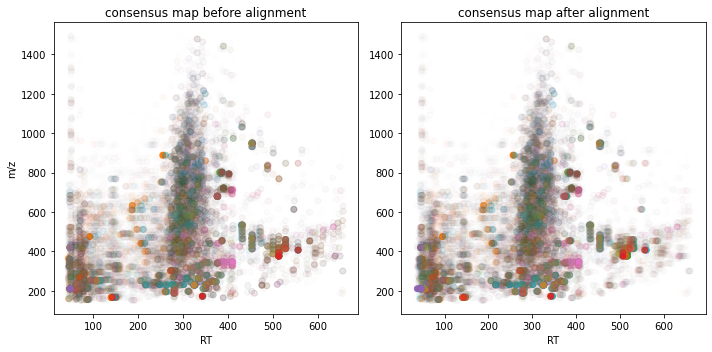

In [18]:
import matplotlib.pyplot as plt
import numpy as np

feature_maps = [feature_maps[ref_index]] + feature_maps[:ref_index] + feature_maps[ref_index+1:]

fig = plt.figure(figsize=(10,5))

ax = fig.add_subplot(1, 2, 1)
ax.set_title('consensus map before alignment')
ax.set_ylabel('m/z')
ax.set_xlabel('RT')

# use alpha value to display feature intensity
ax.scatter([f.getRT() for f in feature_maps[0]], [f.getMZ() for f in feature_maps[0]],
            alpha = np.asarray([f.getIntensity() for f in feature_maps[0]])/max([f.getIntensity() for f in feature_maps[0]]))

for fm in feature_maps[1:]:
    ax.scatter([f.getMetaValue('original_RT') for f in fm], [f.getMZ() for f in fm],
                alpha = np.asarray([f.getIntensity() for f in fm])/max([f.getIntensity() for f in fm]))

ax = fig.add_subplot(1,2,2)
ax.set_title('consensus map after alignment')
ax.set_xlabel('RT')

for fm in feature_maps:
    ax.scatter([f.getRT() for f in fm], [f.getMZ() for f in fm],
                alpha = np.asarray([f.getIntensity() for f in fm])/max([f.getIntensity() for f in fm]))

fig.tight_layout()
#fig.legend([fmap.getDataProcessing()[0].getMetaValue('parameter: out')[:-11] for fmap in feature_maps], loc = 'lower center')
fig.show()

Import aligned feature files and load them to a FeatureMap() file

In [19]:
input_feature_files = sorted(glob.glob("results/GNPSexport/interim/MapAligned*.featureXML"))

feature_maps = []
for featurexml_file in input_feature_files:
    fmap = FeatureMap()
    FeatureXMLFile().load(featurexml_file, fmap)
    feature_maps.append(fmap)

#### `3) IDMapper` 

Introduce the features to a protein identification file (idXML)- the only way to annotate MS2 spectra for GNPS FBMN  

###### Documentation: https://abibuilder.informatik.uni-tuebingen.de/archive/openms/Documentation/nightly/html/TOPP_IDMapper.html

In [20]:
use_centroid_rt= False
use_centroid_mz= True
protein_ids = []
peptide_ids= []

mapper = IDMapper()

input_mzml_files= sorted(glob.glob("results/interim/PCpeak_*.mzML"))

for filename in input_mzml_files:
    exp = MSExperiment()
    MzMLFile().load(filename, exp)

    for fmap in feature_maps:
        peptide_ids = []
        protein_ids = []
        if os.path.basename(fmap.getMetaValue('spectra_data')[0].decode()) == os.path.basename(filename):
            mapper.annotate(fmap, peptide_ids, protein_ids, use_centroid_rt, use_centroid_mz, exp)
            featureidx_file = os.path.join("results", "", "GNPSexport", "", "interim", "", 'IDMapper_' + os.path.basename(fmap.getMetaValue('spectra_data')[0].decode())[7:-5] +".featureXML")
            FeatureXMLFile().store(featureidx_file, fmap)

Unassigned peptides: 0
<ConsensusXMLFile::store():  found 17947 invalid unique ids> occurred 8 times
Peptides assigned to exactly one feature: 0
Peptides assigned to multiple features: 0
Unassigned and unidentified precursors: 4835
Unidentified precursor assigned to exactly one feature: 0
Unidentified precursor assigned to multiple features: 0
Feature annotation with identifications:
    no ID: 2776
    single ID: 0
    multiple IDs (identical): 0
    multiple IDs (divergent): 0


Unassigned peptides: 0
Peptides assigned to exactly one feature: 0
Peptides assigned to multiple features: 0
Unassigned and unidentified precursors: 4986
Unidentified precursor assigned to exactly one feature: 0
Unidentified precursor assigned to multiple features: 0
Feature annotation with identifications:
    no ID: 1253
    single ID: 0
    multiple IDs (identical): 0
    multiple IDs (divergent): 0


Unassigned peptides: 0
Peptides assigned to exactly one feature: 0
Peptides assigned to multiple features:

Import the annotated feature files and load them in a FeatureMap() file

In [22]:
input_feature_files = sorted(glob.glob('results/GNPSexport/interim/IDMapper*.featureXML'))

feature_maps = []
for featurexml_file in input_feature_files:
    fmap = FeatureMap()
    FeatureXMLFile().load(featurexml_file, fmap)
    feature_maps.append(fmap)

#### `4) FeatureGroupingAlgorithmKD `

Feature linker aggregates the feature information (from single files) into a ConsensusFeature, linking features from different files together, which have a smiliar m/z and rt (no MS2 data).

###### Documentation: https://abibuilder.informatik.uni-tuebingen.de/archive/openms/Documentation/release/latest/html/TOPP_FeatureLinkerUnlabeledKD.html

In [23]:
feature_grouper = FeatureGroupingAlgorithmKD()

consensus_map = ConsensusMap()
file_descriptions = consensus_map.getColumnHeaders()

for i, feature_map in enumerate(feature_maps):
    file_description = file_descriptions.get(i, ColumnHeader())
    file_description.filename = feature_map.getMetaValue('spectra_data')[0].decode()
    file_description.size = feature_map.size()
    file_descriptions[i] = file_description

feature_grouper.group(feature_maps, consensus_map)
consensus_map.setColumnHeaders(file_descriptions)


Consensus_file= os.path.join("results", "", "GNPSexport", "","interim", "", 'consensus' + ".consensusXML")
ConsensusXMLFile().store(Consensus_file, consensus_map)


# get intensities as a DataFrame
result = consensus_map.get_df()
result= result.reset_index()
result= result.drop(columns= ["id", "sequence", "quality"])
# store as tsv file
result.to_csv('results/GNPSexport/interim/consensus.tsv', sep = '\t', index = False)
result


  Progress of 'computing RT transformations':
    7.84 %               Warning: Only 48 data points for LOWESS fit of map 0. Consider adjusting RT or m/z tolerance or max_pairwise_log_fc, decreasing min_rel_cc_size, or increasing max_nr_conflicts.

  -- done [took 0.42 s (CPU), 0.42 s (Wall)] -- 

  Progress of 'linking features':
    64.71 %               
  -- done [took 0.89 s (CPU), 0.88 s (Wall)] -- 


,charge,RT,mz,results/interim/PCpeak_20210827_UMETAB219_POS_ISP2_Plate-2_MDNAWGS14_rep2.mzML,results/interim/PCpeak_20211006_UMETAB222_POS_17_DNPM_Plate-11_NBC_00843_rep2.mzML,results/interim/PCpeak_20210827_UMETAB219_POS_ISP2_Plate-2_MDNAWGS14_rep3.mzML,results/interim/PCpeak_20210827_UMETAB219_POS_FPY12_Plate-2_MDNAWGS14_rep2.mzML,results/interim/PCpeak_20211006_UMETAB222_POS_29_DNPM_Plate-11_NBC_00843_rep3.mzML,results/interim/PCpeak_20210826_UMETAB219_POS_ISP2_Plate-1_MDNAWGS11_blank.mzML,results/interim/PCpeak_20210827_UMETAB219_POS_DNPM_Plate-2_MDNAWGS14_rep3.mzML,...,results/interim/PCpeak_20210826_UMETAB219_POS_FPY12_Plate-1_MDNAWGS11_blank.mzML,results/interim/PCpeak_20210826_UMETAB219_POS_FPY12_Plate-1_MDNAWGS11_rep2.mzML,results/interim/PCpeak_20211006_UMETAB222_POS_28_ISP2_Plate-11_NBC_00843_rep3.mzML,results/interim/PCpeak_20210826_UMETAB219_POS_ISP2_Plate-1_MDNAWGS11_rep3.mzML,results/interim/PCpeak_20210827_UMETAB219_POS_DNPM_Plate-2_MDNAWGS14_rep1.mzML,results/interim/PCpeak_20211006_UMETAB222_POS_41_DNPM_Plate-11_NBC_00843_blank.mzML,results/interim/PCpeak_20210826_UMETAB219_POS_FPY12_Plate-1_MDNAWGS11_rep1.mzML,results/interim/PCpeak_20210827_UMETAB219_POS_FPY12_Plate-2_MDNAWGS14_blank.mzML,results/interim/PCpeak_20210826_UMETAB219_POS_DNPM_Plate-1_MDNAWGS11_blank.mzML,results/interim/PCpeak_20210827_UMETAB219_POS_FPY12_Plate-2_MDNAWGS14_rep1.mzML
0,1,91.263603,228.170583,5171968.0,12797590.0,5.268067e+06,10157330.0,11420220.0,11561120.0,7001301.0,...,38153328.0,33809112.0,4901856.0,4179546.0,8485323.0,11457780.0,33203830.0,16406290.0,15081450.0,8868444.0
1,1,85.650541,155.081505,5487225.0,30297260.0,4.778206e+06,61869688.0,35070800.0,5330432.0,6679895.0,...,73878032.0,65520400.0,4718251.0,4324148.0,7531636.0,34357020.0,78157744.0,79998416.0,8595696.0,51392920.0
2,1,526.956292,432.237990,19872470.0,86536176.0,1.428816e+07,6967665.0,59366568.0,24246680.0,24187230.0,...,25221960.0,29741070.0,48563992.0,33033360.0,21002600.0,13124580.0,22572990.0,23137740.0,26173750.0,3945991.0
3,1,71.314587,422.249706,1596503.0,1268769.0,9.801963e+05,3247058.0,949529.5,10965250.0,2466086.0,...,42472672.0,23201970.0,2777376.0,2508161.0,2910690.0,1880466.0,22732180.0,16533320.0,4587963.0,3694485.0
4,1,474.451022,228.195758,6999891.0,14272440.0,8.186186e+06,7161532.0,13652060.0,6188645.0,7100356.0,...,6569792.0,5912017.0,13475320.0,5564580.0,6345927.0,13783730.0,5710600.0,10204820.0,6189592.0,6052424.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17941,2,306.633553,531.290885,0.0,0.0,0.000000e+00,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
17942,2,61.321493,202.118647,0.0,0.0,0.000000e+00,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
17943,2,274.222279,587.760196,0.0,0.0,0.000000e+00,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
17944,2,310.961529,1014.478270,0.0,0.0,0.000000e+00,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


#### `5) File Filter` 

Remove the features that do not have an MS2 pattern

###### Documentation: https://abibuilder.informatik.uni-tuebingen.de/archive/openms/Documentation/release/latest/html/TOPP_FileFilter.html

In [10]:
input_consensus= "results/GNPSexport/interim/consensus.consensusXML"
cmap = ConsensusMap()
ConsensusXMLFile().load(input_consensus, cmap)
new_map= ConsensusMap(cmap)
new_map.clear(False)
for f in cmap:
    if f.getPeptideIdentifications() !=[]:
        new_map.push_back(f)
        
Consensus_file= os.path.join("results", "", "GNPSexport", "", "interim", "",'filtered' + ".consensusXML")
ConsensusXMLFile().store(Consensus_file, new_map)

ConsensusXMLFile::store():  found 7052 invalid unique ids


#### `6) GNPSexport `

The algorithm creates an MGF file with only the MS2 information of all files (introduce mzml files with spaces between them)

###### Documentation: https://abibuilder.informatik.uni-tuebingen.de/archive/openms/Documentation/nightly/html/TOPP_GNPSExport.html

In [ ]:
!resources/OpenMS-2.7.0/bin/GNPSExport -ini resources/GNPSExport.ini -in_cm results/GNPSexport/interim/filtered.consensusXML -in_mzml results/GNPSexport/*.mzML -out results/GNPSexport/MSMS.mgf

#### `7) FeatureQuantificationTable.txt`

Convert the consensusXML file to a txt file for GNPS

In [11]:
input_consensus= "results/GNPSexport/interim/filtered.consensusXML"
cmap = ConsensusMap()
ConsensusXMLFile().load(input_consensus, cmap)

# get intensities as a DataFrame
intensities = cmap.get_intensity_df()

# get meta data as DataFrame
meta_data = cmap.get_metadata_df()

# you can concatenate these two for a "result" DataFrame
result = pd.concat([meta_data, intensities], axis=1)

# if you don't need labeled index, remove it (and/or save with index = False)
result.reset_index(drop=True, inplace=True)

idx = 0
new_col = "CONSENSUS"  # can be a list, a Series, an array or a scalar   
result.insert(loc=idx, column='#CONSENSUS', value=new_col)   
result= result.rename(columns= {"charge": "charge_cf", "RT": "rt_cf", "mz": "mz_cf", "quality": "quality_cf", "width": "width_cf"})
result= result.drop(["sequence"], axis= 1)
result= result.sort_index(axis=1)

filemeta= cmap.getColumnHeaders()
mapIDs = [k for k in filemeta.keys()]
filename= []
size=[]
label= []
for header in filemeta.values():
    files= header.filename
    sizes= header.size
    labels= header.label
    filename.append(files)
    size.append(sizes)
    label.append(labels)

dict = {'id': mapIDs, 'filename': filename,'label': label,'size': size}
DF= pd.DataFrame(dict)
DF["id"] = "intensity_"+ (DF["id"]).astype(str)

cols= result.columns
for col in cols:
    for i, path in enumerate(filename):
        if path== col:
            name= DF["id"][i]
            result.rename(columns={col: name}, inplace=True)

cols = result.columns
preordered = ["#CONSENSUS", "charge_cf", "rt_cf", "mz_cf", "quality_cf", "width_cf"]
new_cols = preordered + [c for c in result.columns if c not in preordered]
new_df = result.reindex(columns=new_cols)
new_df.to_csv('results/GNPSexport/FeatureQuantificationTable.txt', sep = '\t', index = False)
print(new_df)

     #CONSENSUS  charge_cf       rt_cf        mz_cf  quality_cf  width_cf  \
0     CONSENSUS          1   91.263603   228.170583    0.000786       NaN   
1     CONSENSUS          1   85.650541   155.081505    0.001448       NaN   
2     CONSENSUS          1  526.956292   432.237990    0.002653       NaN   
3     CONSENSUS          1   71.314587   422.249706    0.000391       NaN   
4     CONSENSUS          1  474.451022   228.195758    0.000731       NaN   
...         ...        ...         ...          ...         ...       ...   
7046  CONSENSUS          1  450.787237   426.264127    0.000031       NaN   
7047  CONSENSUS          2  327.022050   553.285939    0.000114       NaN   
7048  CONSENSUS          1  432.010972  1084.502471    0.000029       NaN   
7049  CONSENSUS          2  111.798745   301.168825    0.000030       NaN   
7050  CONSENSUS          1  340.122249   569.329673    0.000158       NaN   

      intensity_0  intensity_1  intensity_2  intensity_3  ...  intensity_26

#### `8) Copy mzML raw files` to the GNPSexport directory (Optional)

In [ ]:
input_mzml_files=glob.glob("results/interim/PCpeak_*.mzML")

for mzml_file in input_mzml_files:
    exp= MSExperiment()
    MzMLFile().load(mzml_file, exp)
    ff_file = os.path.join("results", "", "GNPSexport", "", os.path.basename(mzml_file)[7:])
    MzMLFile().store(ff_file, exp)